In [1]:
import pandas as pd

df = pd.read_csv('/Users/siddharthsachdeva/Documents/causal_inference_analysis_data.csv')

## Approach

We observed strong correlation (0.84) between median distance from camera and average weight per day in both of these pens, suggesting an underlying sampling dynamic driving average weights. We'd like to infer the cause of this, based on two hypotheses:

* Varying cohorts of fish in front of the camera day to day
* Varying water quality leading to different fish getting accepted. 

## Cleaning

In [2]:
df = df[df['pen_id'] == 149]
df

,group_id,site_id,pen_id,left_crop_url,right_crop_url,estimated_weight_g,captured_at,akpd_score,estimated_length_mm,estimated_k_factor,process_info,annotation,camera_metadata,pair_id,left_crop_metadata,right_crop_metadata
3,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,5854.343176,2021-02-04 06:09:20.310059+00,0.980996,732.470064,1.489733,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 2002, ""yCrop"": 705, ""x...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060920.310059-c1l2r,"{""width"": 2395, ""height"": 1115, ""x_coord"": 979...","{""width"": 2566, ""height"": 1196, ""x_coord"": 539..."
4,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,6041.275263,2021-02-04 06:09:42.275716+00,0.995671,734.580010,1.524092,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 1875, ""yCrop"": 391, ""x...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060942.275716-c1l2r,"{""width"": 2163, ""height"": 1165, ""x_coord"": 898...","{""width"": 2428, ""height"": 1149, ""x_coord"": 446..."
7,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,3626.642227,2021-02-04 06:09:52.378807+00,0.995713,677.514515,1.166135,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 378, ""yCrop"": 613, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060952.378807-c1l3r,"{""width"": 2307, ""height"": 1048, ""x_coord"": 219...","{""width"": 2330, ""height"": 1040, ""x_coord"": 0, ..."
8,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4166.067541,2021-02-04 06:09:54.321166+00,0.996913,684.395409,1.299586,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 289, ""yCrop"": 366, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060954.321166-c1l2r,"{""width"": 2178, ""height"": 1091, ""x_coord"": 160...","{""width"": 2177, ""height"": 1097, ""x_coord"": 131..."
10,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4194.080234,2021-02-04 06:10:02.294815+00,0.993560,661.377387,1.449735,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 320, ""yCrop"": 461, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_061002.294815-c1l2r,"{""width"": 2162, ""height"": 1207, ""x_coord"": 193...","{""width"": 2199, ""height"": 1267, ""x_coord"": 163..."
11,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,6392.171979,2021-02-04 06:09:59.275372+00,0.967216,750.408239,1.512710,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 423, ""yCrop"": 634, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060959.275372-c1l2r,"{""width"": 3188, ""height"": 1333, ""x_coord"": 336...","{""width"": 3162, ""height"": 1340, ""x_coord"": 0, ..."
13,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4051.592946,2021-02-04 06:11:09.266203+00,0.996926,698.597768,1.188350,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 306, ""yCrop"": 464, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_061109.266203-c1l2r,"{""width"": 2613, ""height"": 1121, ""x_coord"": 148...","{""width"": 2646, ""height"": 1141, ""x_coord"": 113..."
14,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4664.367437,2021-02-04 06:11:21.310778+00,0.993294,712.426280,1.289950,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""lef

In [3]:
df['captured_at'] = pd.to_datetime(df['captured_at'])
df['date'] = df['captured_at'].apply(lambda c: c.date())
df['hour'] = df['captured_at'].apply(lambda c: c.hour)
df

,group_id,site_id,pen_id,left_crop_url,right_crop_url,estimated_weight_g,captured_at,akpd_score,estimated_length_mm,estimated_k_factor,process_info,annotation,camera_metadata,pair_id,left_crop_metadata,right_crop_metadata,date,hour
3,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,5854.343176,2021-02-04 06:09:20.310059+00:00,0.980996,732.470064,1.489733,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 2002, ""yCrop"": 705, ""x...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060920.310059-c1l2r,"{""width"": 2395, ""height"": 1115, ""x_coord"": 979...","{""width"": 2566, ""height"": 1196, ""x_coord"": 539...",2021-02-04,6
4,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,6041.275263,2021-02-04 06:09:42.275716+00:00,0.995671,734.580010,1.524092,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 1875, ""yCrop"": 391, ""x...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060942.275716-c1l2r,"{""width"": 2163, ""height"": 1165, ""x_coord"": 898...","{""width"": 2428, ""height"": 1149, ""x_coord"": 446...",2021-02-04,6
7,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,3626.642227,2021-02-04 06:09:52.378807+00:00,0.995713,677.514515,1.166135,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 378, ""yCrop"": 613, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060952.378807-c1l3r,"{""width"": 2307, ""height"": 1048, ""x_coord"": 219...","{""width"": 2330, ""height"": 1040, ""x_coord"": 0, ...",2021-02-04,6
8,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4166.067541,2021-02-04 06:09:54.321166+00:00,0.996913,684.395409,1.299586,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 289, ""yCrop"": 366, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060954.321166-c1l2r,"{""width"": 2178, ""height"": 1091, ""x_coord"": 160...","{""width"": 2177, ""height"": 1097, ""x_coord"": 131...",2021-02-04,6
10,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4194.080234,2021-02-04 06:10:02.294815+00:00,0.993560,661.377387,1.449735,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 320, ""yCrop"": 461, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_061002.294815-c1l2r,"{""width"": 2162, ""height"": 1207, ""x_coord"": 193...","{""width"": 2199, ""height"": 1267, ""x_coord"": 163...",2021-02-04,6
11,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,6392.171979,2021-02-04 06:09:59.275372+00:00,0.967216,750.408239,1.512710,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 423, ""yCrop"": 634, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_060959.275372-c1l2r,"{""width"": 3188, ""height"": 1333, ""x_coord"": 336...","{""width"": 3162, ""height"": 1340, ""x_coord"": 0, ...",2021-02-04,6
13,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4051.592946,2021-02-04 06:11:09.266203+00:00,0.996926,698.597768,1.188350,"{""akpd_model"": ""fcb8afa9f5917b4e8bfa643becc06c...","{""leftCrop"": [{""xCrop"": 306, ""yCrop"": 464, ""xF...","{""baseline"": 0.10514571045320462, ""focalLength...",p149-t20210204_061109.266203-c1l2r,"{""width"": 2613, ""height"": 1121, ""x_coord"": 148...","{""width"": 2646, ""height"": 1141, ""x_coord"": 113...",2021-02-04,6
14,149,88,149,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4664.367437

In [4]:
def filter_rows(row):
    return row['hour'] >= 7 and row['hour'] < 14
df = df[df.apply(filter_rows, axis=1)]

In [5]:
import json

df['annotation'] = df['annotation'].apply(json.loads)
df['camera_metadata'] = df['camera_metadata'].apply(json.loads)

<ipython-input-5-7b93dca2d42c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['annotation'] = df['annotation'].apply(json.loads)
<ipython-input-5-7b93dca2d42c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['camera_metadata'] = df['camera_metadata'].apply(json.loads)


In [6]:
from research.weight_estimation.keypoint_utils.optics import pixel2world
import numpy as np

def get_distance(row):
    coords = pixel2world(
        row['annotation']['leftCrop'],
        row['annotation']['rightCrop'],
        row['camera_metadata']
    )
    y = np.median([x[1] for x in coords.values()])
    return y
    
df['distance'] = df.apply(get_distance, axis=1)

<ipython-input-6-fed7cf788506>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['distance'] = df.apply(get_distance, axis=1)


### Get cohorts

In [7]:
df.groupby(['date'])['estimated_weight_g'].aggregate('count')

date
2021-02-01    1410
2021-02-02    1152
2021-02-03    1367
2021-02-04    1152
2021-02-05    1167
2021-02-06    1007
2021-02-07    1429
2021-02-08    1114
2021-02-09     978
2021-02-10    1699
2021-02-11    1574
2021-02-12    2000
2021-02-13    1756
2021-02-14    1713
2021-02-15    1244
2021-02-16    1679
2021-02-17    1301
2021-02-18    1337
2021-02-19    1701
2021-02-20    2376
2021-02-21     583
2021-02-22    1483
2021-02-23    2068
2021-02-24    1102
2021-02-25    1477
2021-02-26    1759
2021-02-27    1247
2021-02-28    1766
2021-03-01    1274
2021-03-02    1540
2021-03-03    1431
2021-03-04    1546
2021-03-05    2076
2021-03-06    2107
2021-03-07    1284
2021-03-09     466
2021-03-10     908
2021-03-11    1079
2021-03-12    1917
2021-03-13    1773
2021-03-14    1633
2021-03-15    1242
2021-03-16    1066
2021-03-17    1199
2021-03-18      66
Name: estimated_weight_g, dtype: int64

In [8]:
import datetime as dt

start = dt.date(year=2021, month=3, day=5)
end = dt.date(year=2021, month=3, day=7)
some = df[df['date'].between(start, end)]

In [9]:
some.columns

Index(['group_id', 'site_id', 'pen_id', 'left_crop_url', 'right_crop_url',
       'estimated_weight_g', 'captured_at', 'akpd_score',
       'estimated_length_mm', 'estimated_k_factor', 'process_info',
       'annotation', 'camera_metadata', 'pair_id', 'left_crop_metadata',
       'right_crop_metadata', 'date', 'hour', 'distance'],
      dtype='object')

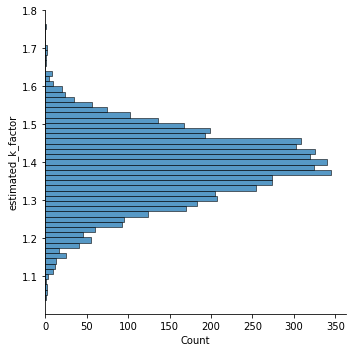

In [11]:
import seaborn as sns

sns.displot(some, y='estimated_k_factor')

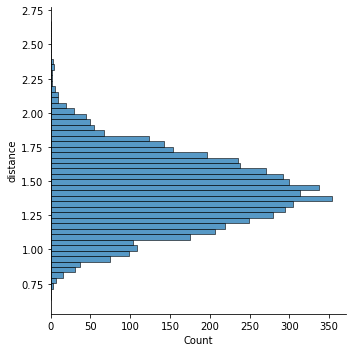

In [12]:
sns.displot(some, y='distance')

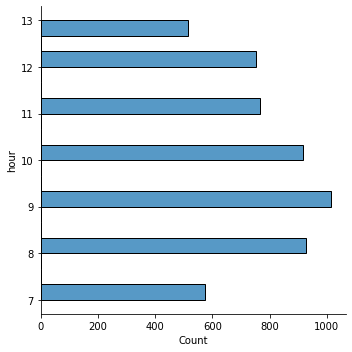

In [13]:
sns.displot(some, y='hour')

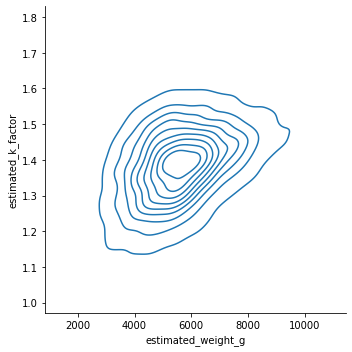

In [14]:
import seaborn as sns

sns.displot(some, x='estimated_weight_g', y='estimated_k_factor', kind='kde')

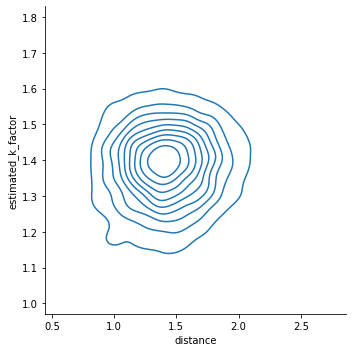

In [15]:
sns.displot(some, x='distance', y='estimated_k_factor', kind='kde')

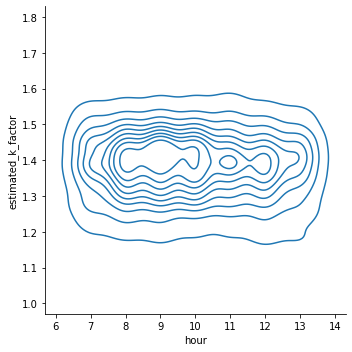

In [16]:
sns.displot(some, x='hour', y='estimated_k_factor', kind='kde')

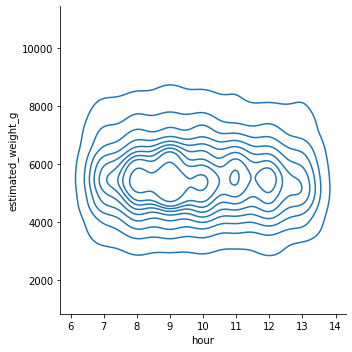

In [17]:
sns.displot(some, x='hour', y='estimated_weight_g', kind='kde')

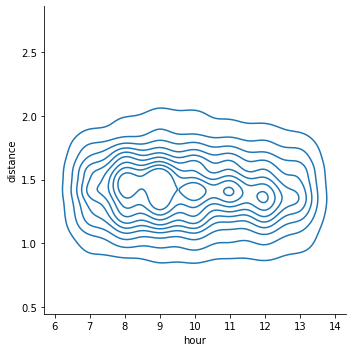

In [18]:
sns.displot(some, x='hour', y='distance', kind='kde')

In [19]:
df['date'].between(start, end)

134       False
135       False
138       False
141       False
142       False
143       False
144       False
145       False
146       False
147       False
148       False
149       False
152       False
153       False
161       False
162       False
163       False
164       False
165       False
166       False
167       False
168       False
169       False
170       False
171       False
172       False
173       False
174       False
175       False
177       False
          ...  
292088    False
292091    False
292094    False
292095    False
292099    False
292103    False
292109    False
292111    False
292115    False
292116    False
292117    False
292118    False
292119    False
292123    False
292125    False
292127    False
292131    False
292133    False
292135    False
292139    False
292140    False
292144    False
292145    False
292147    False
292163    False
292164    False
292168    False
292169    False
292170    False
292172    False
Name: date, Length: 6324

## Water quality

In [20]:
raw_crops = pd.read_csv('/Users/siddharthsachdeva/Documents/causal_raw_crops.csv')

/Users/siddharthsachdeva/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
raw_crops = raw_crops[raw_crops['service_id'] == 1 & (raw_crops['pen_id'] == 149)]
raw_crops['captured_at'] = pd.to_datetime(raw_crops['captured_at'])
raw_crops['date'] = raw_crops['captured_at'].apply(lambda c: c.date())
raw_crops = raw_crops[raw_crops['left_crop_metadata'].notnull()]

In [22]:
raw_crops['quality_score'] = raw_crops['left_crop_metadata'].apply(json.loads).apply(lambda m: m['quality_score'])

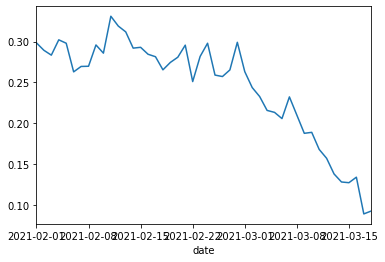

In [23]:
daily_quality_score = raw_crops.groupby('date')['quality_score'].mean()
daily_quality_score.plot()

In [24]:
df['quality_score'] = df['date'].apply(lambda d: daily_quality_score.loc[d])

<ipython-input-24-669dff2c5818>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['quality_score'] = df['date'].apply(lambda d: daily_quality_score.loc[d])


In [61]:
daily = df.groupby('date')[['estimated_weight_g', 'distance', 'quality_score']].mean()
daily

,estimated_weight_g,distance,quality_score
date,,,
2021-02-01,5249.723883,1.390729,0.298395
2021-02-02,5339.961677,1.417949,0.289313
2021-02-03,5260.969921,1.394237,0.283364
2021-02-04,5423.817404,1.433886,0.302128
2021-02-05,5438.072775,1.415280,0.297957
2021-02-06,5478.334384,1.439117,0.262890
2021-02-07,5497.866909,1.415337,0.269515
2021-02-08,5444.850085,1.415265,0.269770
2021-02-09,5508.110393,1.455038,0.295840


In [26]:
daily.corr()

,estimated_weight_g,distance,quality_score
estimated_weight_g,1.000000,0.614502,-0.378968
distance,0.614502,1.000000,-0.061113
quality_score,-0.378968,-0.061113,1.000000


In [27]:
daily.tail(16).corr()

,estimated_weight_g,distance,quality_score
estimated_weight_g,1.000000,0.839063,0.238640
distance,0.839063,1.000000,0.340288
quality_score,0.238640,0.340288,1.000000


In [28]:
df[['estimated_weight_g', 'distance', 'quality_score']].corr()

,estimated_weight_g,distance,quality_score
estimated_weight_g,1.000000,0.295632,-0.052047
distance,0.295632,1.000000,-0.023375
quality_score,-0.052047,-0.023375,1.000000


In [29]:
df[df['date'].isin(daily.tail(16).index)][['estimated_weight_g', 'distance', 'quality_score']].corr()

,estimated_weight_g,distance,quality_score
estimated_weight_g,1.000000,0.287241,0.001576
distance,0.287241,1.000000,0.047463
quality_score,0.001576,0.047463,1.000000


In [30]:
df['day'] = df['captured_at'].apply(lambda c: c.dayofyear)

<ipython-input-30-be3cf181e22f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['day'] = df['captured_at'].apply(lambda c: c.dayofyear)


In [31]:
df[['quality_score', 'day']].corr()

,quality_score,day
quality_score,1.000000,-0.849944
day,-0.849944,1.000000


In [32]:
from collections import defaultdict

out = dict()

for col in ['quality_score', 'estimated_k_factor', 'hour']:
    out[col] = dict()
    bins = [df[col].quantile(p) for p in [0., 0.2, 0.4, 0.6, 0.8, 1]]
    df[f'{col}_bin'], binedges = pd.cut(df[col], bins=bins, retbins=True, labels=False)
    for i, binn in enumerate(binedges):
        this = df[df[f'{col}_bin'] == i]
        daily = this.groupby('date')[['estimated_weight_g', 'distance']].mean()
        corr = daily.corr()
        c = corr.iloc[0]['distance']
        out[col][i] =  c
out

<ipython-input-32-9d72e0cebb78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'{col}_bin'], binedges = pd.cut(df[col], bins=bins, retbins=True, labels=False)


{'quality_score': {0: 0.8413139074380108,
  1: 0.5821641315661427,
  2: 0.35418596455917095,
  3: 0.3192397874626612,
  4: 0.26851743584571836,
  5: nan},
 'estimated_k_factor': {0: 0.6227036776264208,
  1: 0.668299914767478,
  2: 0.5029067467820747,
  3: 0.4759739211927582,
  4: 0.49925322823797946,
  5: nan},
 'hour': {0: 0.35374207488122617,
  1: 0.46122252880829606,
  2: 0.5339560039860365,
  3: 0.5388412782869967,
  4: 0.6314742837191686,
  5: nan}}

In [33]:
pd.DataFrame(out)

,quality_score,estimated_k_factor,hour
0,0.841314,0.622704,0.353742
1,0.582164,0.668300,0.461223
2,0.354186,0.502907,0.533956
3,0.319240,0.475974,0.538841
4,0.268517,0.499253,0.631474
5,NaN,NaN,NaN


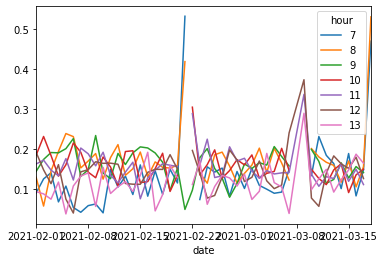

In [37]:
daily_hours = df.groupby('date')['hour'].value_counts(normalize=True).unstack()
daily_hours.plot()

In [42]:
ideal_proportions = daily_hours.mean() / daily_hours.mean().sum()
ideal_proportions

hour
7     0.128476
8     0.166667
9     0.151971
10    0.150801
11    0.149969
12    0.138506
13    0.113610
dtype: float64

In [45]:
def weight(row):
    return ideal_proportions[row['hour']] * row['estimated_weight_g']
df['weighted_weight'] = df.apply(weight, axis=1)

134        611.135794
135        583.671555
138        794.968467
141        755.581046
142        863.172067
143        888.689433
144        750.370395
145        738.213306
146        681.427897
147        622.467299
148        657.469959
149        766.282623
152        617.288427
153        411.364090
161        653.563961
162        695.145639
163        766.661606
164        770.219098
165        558.172530
166        676.741420
167        725.226192
168        584.051955
169        657.171918
170        607.184233
171        761.935921
172        879.462130
173        765.456886
174        510.501472
175        550.204469
177        683.742304
             ...     
292088     883.660284
292091    1046.209863
292094     750.321502
292095     745.176063
292099     901.724924
292103     851.778841
292109     960.748131
292111     860.216504
292115     854.469305
292116     510.122697
292117     761.057925
292118     897.542849
292119     771.918375
292123     951.385997
292125    

In [59]:
def weighted_mean(de):
    de.name = 'weight'
    d = de.reset_index()
    d['prop'] = d.apply(
        lambda row: ideal_proportions[row['hour']], axis=1)
    total_prop = d['prop'].sum()
    return d.reset_index().apply(
        lambda row: (ideal_proportions[row['hour']] / total_prop) * row['weight'], axis=1).sum()

resampled_weights = df.groupby(['date', 'hour'])['estimated_weight_g'].mean().groupby('date').apply(weighted_mean)
resampled_weights

date
2021-02-01    5224.147573
2021-02-02    5358.240382
2021-02-03    5264.389006
2021-02-04    5447.086890
2021-02-05    5447.936216
2021-02-06    5550.744222
2021-02-07    5480.120925
2021-02-08    5433.298562
2021-02-09    5529.214110
2021-02-10    5543.390018
2021-02-11    5323.337323
2021-02-12    5392.170738
2021-02-13    5418.294594
2021-02-14    5359.298148
2021-02-15    5401.441347
2021-02-16    5298.337130
2021-02-17    5344.217778
2021-02-18    5612.399515
2021-02-19    5404.681824
2021-02-20    5483.462803
2021-02-21    5474.887584
2021-02-22    5564.897200
2021-02-23    5403.541689
2021-02-24    5221.918276
2021-02-25    5696.791881
2021-02-26    5516.805577
2021-02-27    5538.050736
2021-02-28    5514.163361
2021-03-01    5512.959970
2021-03-02    5542.276348
2021-03-03    5526.393082
2021-03-04    5478.687504
2021-03-05    5607.177536
2021-03-06    5714.738492
2021-03-07    5429.239100
2021-03-09    5919.404050
2021-03-10    5719.717278
2021-03-11    5501.928838
2021-03

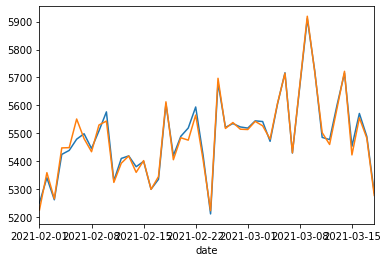

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

daily['estimated_weight_g'].plot(ax=ax)
resampled_weights.plot(ax=ax)

In [65]:
daily['resampled'] = resampled_weights

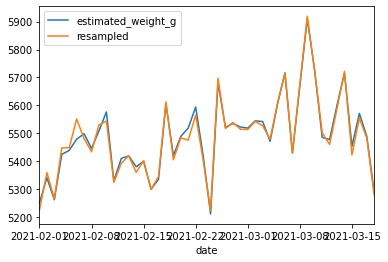

In [66]:
daily.plot(y=['estimated_weight_g', 'resampled'])

In [68]:
daily.corr()

,estimated_weight_g,distance,quality_score,resampled
estimated_weight_g,1.000000,0.614502,-0.378968,0.990856
distance,0.614502,1.000000,-0.061113,0.650266
quality_score,-0.378968,-0.061113,1.000000,-0.363055
resampled,0.990856,0.650266,-0.363055,1.000000


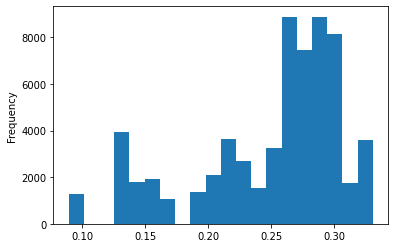

In [86]:
df['quality_score'].plot.hist(bins=20)

In [89]:
df['q_bin'] = pd.cut(df['quality_score'], bins=[df['quality_score'].quantile(i) for i in np.arange(0, 1.1, 0.1)])

<ipython-input-89-b37e9f260770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['q_bin'] = pd.cut(df['quality_score'], bins=[df['quality_score'].quantile(i) for i in np.arange(0, 1.1, 0.1)])


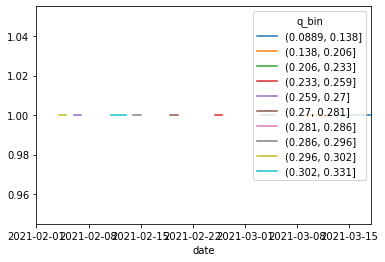

In [90]:
daily_dists = df.groupby('date')['q_bin'].value_counts(normalize=True).unstack()
daily_dists.plot()

In [81]:
ideal_proportions = daily_dists.mean() / daily_dists.mean().sum()
ideal_proportions

distance_bin
(0.629, 1.066]    0.098356
(1.066, 1.175]    0.097455
(1.175, 1.257]    0.099130
(1.257, 1.329]    0.099122
(1.329, 1.394]    0.099637
(1.394, 1.46]     0.100498
(1.46, 1.531]     0.100977
(1.531, 1.612]    0.099615
(1.612, 1.726]    0.101398
(1.726, 3.004]    0.103813
dtype: float64

In [82]:
def weighted_mean(de):
    de.name = 'weight'
    d = de.reset_index()
    d['prop'] = d.apply(
        lambda row: ideal_proportions[row['distance_bin']], axis=1)
    total_prop = d['prop'].sum()
    return d.reset_index().apply(
        lambda row: (ideal_proportions[row['distance_bin']] / total_prop) * row['weight'], axis=1).sum()

resampled_weights = df.groupby(['date', 'distance_bin'])['estimated_weight_g'].mean().groupby('date').apply(weighted_mean)
resampled_weights

date
2021-02-01    5265.665981
2021-02-02    5314.134698
2021-02-03    5271.847802
2021-02-04    5375.523667
2021-02-05    5427.864300
2021-02-06    5427.979045
2021-02-07    5475.312230
2021-02-08    5427.514824
2021-02-09    5422.277949
2021-02-10    5530.014069
2021-02-11    5384.067211
2021-02-12    5470.930828
2021-02-13    5470.313370
2021-02-14    5415.946755
2021-02-15    5388.636929
2021-02-16    5335.440239
2021-02-17    5351.474409
2021-02-18    5521.690485
2021-02-19    5460.531028
2021-02-20    5612.558622
2021-02-21    5586.740037
2021-02-22    5536.383595
2021-02-23    5457.239733
2021-02-24    5257.353656
2021-02-25    5688.291394
2021-02-26    5527.878497
2021-02-27    5565.394825
2021-02-28    5551.477240
2021-03-01    5495.416811
2021-03-02    5560.514453
2021-03-03    5518.754622
2021-03-04    5471.977454
2021-03-05    5537.837814
2021-03-06    5673.468883
2021-03-07    5481.048758
2021-03-09    5756.907526
2021-03-10    5562.516025
2021-03-11    5477.948493
2021-03

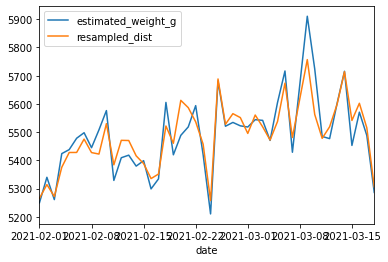

In [84]:
daily['resampled_dist'] = resampled_weights
daily.plot(y=['estimated_weight_g', 'resampled_dist'])

In [91]:
daily.corr()

,estimated_weight_g,distance,quality_score,resampled,resampled_dist
estimated_weight_g,1.000000,0.614502,-0.378968,0.990856,0.917253
distance,0.614502,1.000000,-0.061113,0.650266,0.259970
quality_score,-0.378968,-0.061113,1.000000,-0.363055,-0.404223
resampled,0.990856,0.650266,-0.363055,1.000000,0.887968
resampled_dist,0.917253,0.259970,-0.404223,0.887968,1.000000


In [92]:
daily.tail().corr()

,estimated_weight_g,distance,quality_score,resampled,resampled_dist
estimated_weight_g,1.000000,0.880929,0.640012,0.997319,0.977612
distance,0.880929,1.000000,0.217416,0.910572,0.778838
quality_score,0.640012,0.217416,1.000000,0.594762,0.725521
resampled,0.997319,0.910572,0.594762,1.000000,0.960318
resampled_dist,0.977612,0.778838,0.725521,0.960318,1.000000


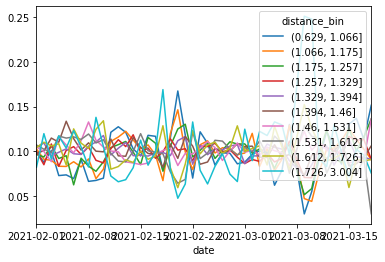

In [80]:
daily_dists = df.groupby('date')['distance_bin'].value_counts(normalize=True).unstack()
daily_dists.plot()

In [81]:
ideal_proportions = daily_dists.mean() / daily_dists.mean().sum()
ideal_proportions

distance_bin
(0.629, 1.066]    0.098356
(1.066, 1.175]    0.097455
(1.175, 1.257]    0.099130
(1.257, 1.329]    0.099122
(1.329, 1.394]    0.099637
(1.394, 1.46]     0.100498
(1.46, 1.531]     0.100977
(1.531, 1.612]    0.099615
(1.612, 1.726]    0.101398
(1.726, 3.004]    0.103813
dtype: float64

In [82]:
def weighted_mean(de):
    de.name = 'weight'
    d = de.reset_index()
    d['prop'] = d.apply(
        lambda row: ideal_proportions[row['distance_bin']], axis=1)
    total_prop = d['prop'].sum()
    return d.reset_index().apply(
        lambda row: (ideal_proportions[row['distance_bin']] / total_prop) * row['weight'], axis=1).sum()

resampled_weights = df.groupby(['date', 'distance_bin'])['estimated_weight_g'].mean().groupby('date').apply(weighted_mean)
resampled_weights

date
2021-02-01    5265.665981
2021-02-02    5314.134698
2021-02-03    5271.847802
2021-02-04    5375.523667
2021-02-05    5427.864300
2021-02-06    5427.979045
2021-02-07    5475.312230
2021-02-08    5427.514824
2021-02-09    5422.277949
2021-02-10    5530.014069
2021-02-11    5384.067211
2021-02-12    5470.930828
2021-02-13    5470.313370
2021-02-14    5415.946755
2021-02-15    5388.636929
2021-02-16    5335.440239
2021-02-17    5351.474409
2021-02-18    5521.690485
2021-02-19    5460.531028
2021-02-20    5612.558622
2021-02-21    5586.740037
2021-02-22    5536.383595
2021-02-23    5457.239733
2021-02-24    5257.353656
2021-02-25    5688.291394
2021-02-26    5527.878497
2021-02-27    5565.394825
2021-02-28    5551.477240
2021-03-01    5495.416811
2021-03-02    5560.514453
2021-03-03    5518.754622
2021-03-04    5471.977454
2021-03-05    5537.837814
2021-03-06    5673.468883
2021-03-07    5481.048758
2021-03-09    5756.907526
2021-03-10    5562.516025
2021-03-11    5477.948493
2021-03

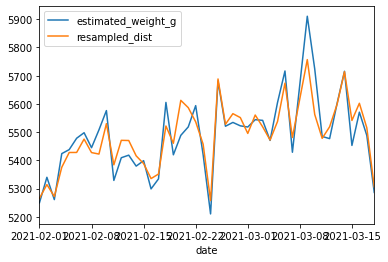

In [84]:
daily['resampled_dist'] = resampled_weights
daily.plot(y=['estimated_weight_g', 'resampled_dist'])

In [85]:
daily.corr()

,estimated_weight_g,distance,quality_score,resampled,resampled_dist
estimated_weight_g,1.000000,0.614502,-0.378968,0.990856,0.917253
distance,0.614502,1.000000,-0.061113,0.650266,0.259970
quality_score,-0.378968,-0.061113,1.000000,-0.363055,-0.404223
resampled,0.990856,0.650266,-0.363055,1.000000,0.887968
resampled_dist,0.917253,0.259970,-0.404223,0.887968,1.000000


In [100]:
out = df.groupby(['date', 'hour'])[['estimated_weight_g']].mean()
out

estimated_weight_g
date       hour                    
2021-02-01 7            4946.323782
           8            5143.054543
           9            5128.488270
           10           5233.015777
           11           5412.992352
           12           5410.847862
           13           5296.582810
2021-02-02 7            5235.976328
           8            5415.530796
           9            5328.829235
           10           5376.989370
           11           5215.712007
           12           5270.490795
           13           5722.032037
2021-02-03 7            5008.808123
           8            5210.047617
           9            5334.921114
           10           5333.226506
           11           5200.113831
           12           5429.812664
           13           5330.585024
2021-02-04 7            5616.540588
           8            5152.466439
           9            5318.579985
           10           5530.552623
           11           5502.104184
           12           5530.115057
           13           5574.932852
2021-02-05 7            5421.512501
           8            5401.533116
...                             ...
2021-03-14 7            5900.106224
           8            5720.207483
           9            5499.160650
           10           5807.876146
           11           5809.911741
           12           5766.665471
           13           5535.365631
2021-03-15 7            5583.320463
           8            5525.964718
           9            5302.135866
           10           5290.380489
           11           5254.573284
           12           5511.795235
           13           5533.020882
2021-03-16 7            5648.226447
           8            5532.962983
           9            5718.301404
           10           5231.966436
           11           5510.214234
           12           5580.796557
           13           5718.514226
2021-03-17 7            5424.491263
           8            5450.663775
           9            5411.239782
           10           5561.764070
           11           5382.916613
           12           5610.964396
           13           5557.732766
2021-03-18 7            5440.099605
           8            5150.345777

[300 rows x 1 columns]

In [106]:
out = out.unstack()

In [107]:
out['dist'] = daily['distance']

In [114]:
out.corr()['estimated_weight_g'].loc['dist'].loc[7]

hour
7     0.295533
8     0.265633
9     0.353981
10    0.388721
11    0.505764
12    0.432095
13    0.611451
Name: 7, dtype: float64